In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_csv('data/all_ride_predictions.csv')
df = df.set_index('started_on_hour')

In [5]:
df.head(3)

,num_rides,weekend,HeatIndexC,precipMM,humidity,federal_holiday,day_of_week_0.0,day_of_week_1.0,day_of_week_2.0,day_of_week_3.0,day_of_week_4.0,day_of_week_5.0,day_of_week_6.0,hour,day_of_month,xgboost_pred,lstm_pred,stacked_pred,zone
started_on_hour,,,,,,,,,,,,,,,,,,,
2016-07-01 06:00:00+00:00,2,0.0,28.0,0.0,94.0,0.0,0,0,0,0,1,0,0,6,1,-0.057694,1.328790,0.75,0
2016-07-01 07:00:00+00:00,0,0.0,30.0,0.0,85.0,0.0,0,0,0,0,1,0,0,7,1,0.048913,0.646130,0.41,0
2016-07-01 08:00:00+00:00,0,0.0,32.0,0.0,75.0,0.0,0,0,0,0,1,0,0,8,1,0.762741,1.013599,1.25,0


___

Note: We also tried a stacked model: a model that took predictions from XGBoost and LSTM as inputs and ran a Random Forest Regressor. However, the results were marginally worse and we went for a simpler, more reliable model.

In [4]:
print(np.mean(abs(
    df['xgboost_pred'] - df['num_rides']
)))
print(np.mean(abs(
    df['lstm_pred'] - df['num_rides']
)))
print(np.mean(abs(
    df['stacked_pred'] - df['num_rides']
)))

9.362027642530052
6.098925491749947
6.211882161690654


In [178]:
((df_zone['xgboost_pred'] - df_zone['num_rides']) ** 2).mean() ** .5

26.39285447883763

In [177]:
((df_zone['lstm_pred'] - df_zone['num_rides']) ** 2).mean() ** .5

18.421392587901497

In [158]:
df = df.drop_duplicates(['started_on_hour', 'zone'])
df_group = df[['started_on_hour', 'num_rides', 'lstm_pred', 'xgboost_pred']].groupby(['started_on_hour']).sum()

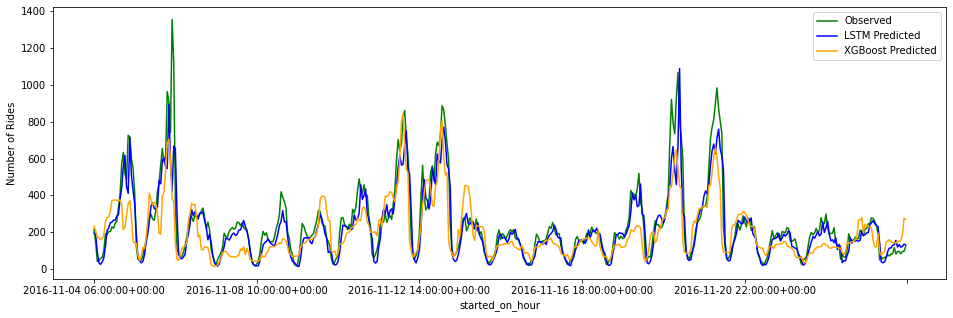

In [296]:
ax = df_group.iloc[3000:3500].plot(
    figsize=(16,5),
    color= {'lstm_pred': 'blue', 'num_rides': 'green', 'xgboost_pred': 'orange'},
    rot = 0
)

ax.set_ylabel("Number of Rides")
ax.legend(["Observed", "LSTM Predicted", "XGBoost Predicted"])

# plt.savefig('img/sample_demand_forecast.png')

/Users/tanmaybansal/Desktop/projectx_final/projectx_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


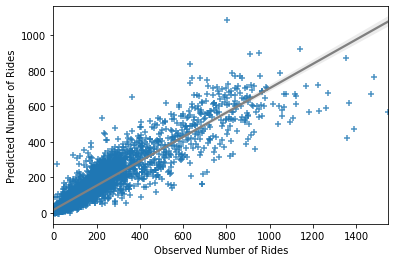

In [278]:
ax = sns.regplot(df_group['num_rides'],
                 df_group['lstm_pred'], 
                 marker="+",
                line_kws = {'color': 'grey'})
ax.set_xlabel("Observed Number of Rides")
ax.set_ylabel("Predicted Number of Rides")
plt.savefig('img/predictions_lstm.png')

/Users/tanmaybansal/Desktop/projectx_final/projectx_venv/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


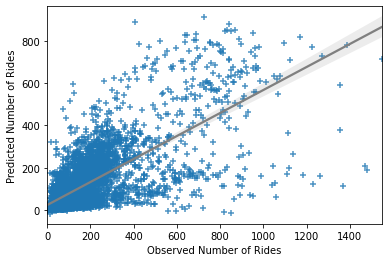

In [252]:
ax = sns.regplot(df_group['num_rides'],
                 df_group['xgboost_pred'], 
                 marker="+",
                line_kws = {'color': 'grey'})
ax.set_xlabel("Observed Number of Rides")
ax.set_ylabel("Predicted Number of Rides")
plt.savefig('img/predictions_xgboost.png')

____

In [253]:
df = pd.read_csv('data/predicted_deadheading_delta.csv')

In [259]:
df.head(2)

,Unnamed: 0,driver_id,started_on_date,ride_deadheading,predicted_deadheading_distance,difference,emissions,actual_emissions_in_g,predicted_emissions_in_g
0,0,1,2016-09-19,0.496588,10.261502,-9.764914,430.0,132.683207,2741.765910
1,1,1,2016-10-18,0.324581,9.403436,-9.078856,430.0,86.724517,2512.499718


In [267]:
df_combined = df.groupby('started_on_date').agg({
    'actual_emissions_in_g': np.sum,
    'predicted_emissions_in_g': np.sum
})

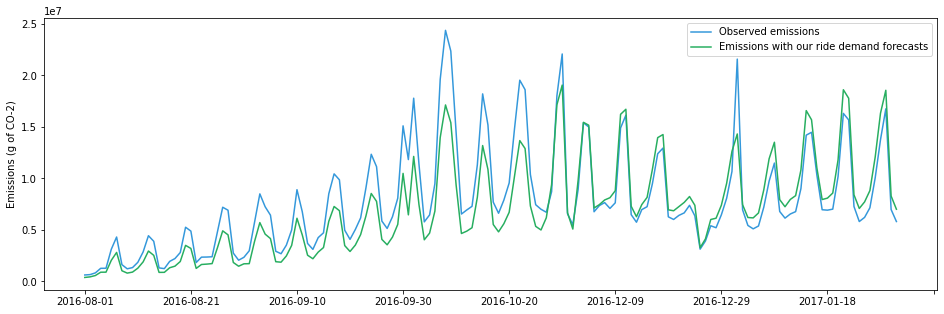

In [300]:
ax = df_combined.plot(
    figsize=(16,5),
    color= {'predicted_emissions_in_g': '#27ae60', 'actual_emissions_in_g': '#3498db'},
    rot = 0
)
ax.set_xlabel('')
ax.set_ylabel("Emissions (g of CO-2)")
ax.legend(["Observed emissions", "Emissions with our ride demand forecasts"])

plt.savefig('img/emissions_reduction_time_series.png')

____